In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

Text(0, 0.5, 'package in lpa')

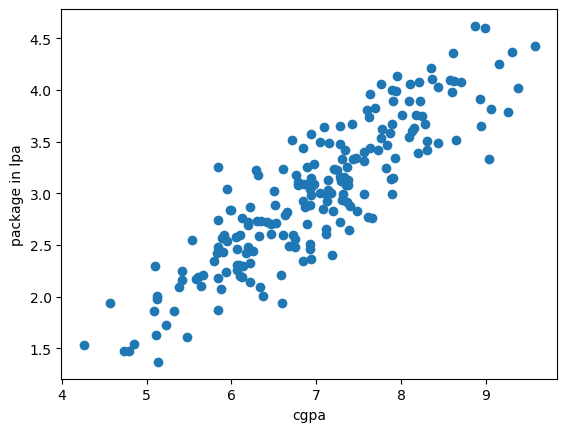

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package in lpa')

In [12]:
X=df[['cgpa']]
y=df['package']

In [13]:
X.shape

(200, 1)

In [14]:
y.shape

(200,)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [20]:
X_train.shape

(140, 1)

In [21]:
X_test.shape

(60, 1)

In [22]:
y_train.shape

(140,)

In [23]:
y_test.shape

(60,)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
# the linear regression best fit line

Text(0, 0.5, 'package in lpa')

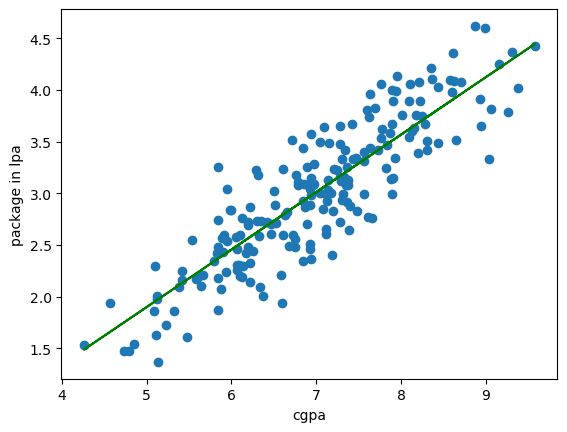

In [27]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='green')
plt.xlabel('cgpa')
plt.ylabel('package in lpa')

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
# pass y_test and y_pred in these metrics to see the model performance according to different metrics.

In [30]:
y_pred=lr.predict(X_test)

In [31]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61, 3.13, 3.91, 2.25, 2.3 ,
       4.06, 3.18, 2.7 , 2.49, 3.15, 2.99, 4.08, 4.14, 2.6 , 2.44, 2.71,
       2.72, 1.63, 2.31, 2.51, 3.5 ])

In [32]:
mean_absolute_error(y_test,y_pred)

0.2874910067960929

In [33]:
mean_squared_error(y_test,y_pred)

0.1185889515124916

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.3443674658159385

In [35]:
r2 = r2_score(y_test,y_pred)

In [36]:
r2

0.7736419609402847

In [39]:
r2_adj = 1-((1-r2)*(60-1)/(60-1-1))

In [40]:
r2_adj

0.7697392361289103

In [41]:
#adding different columns to see variation in r2_adjusted_score

In [43]:
df1=df.copy()
df1['factor']=np.random.random(200)
df1=df1[['cgpa','factor','package']]

In [44]:
df1.head()

,cgpa,factor,package
0,6.89,0.283908,3.26
1,5.12,0.396727,1.98
2,7.82,0.592514,3.25
3,7.42,0.711360,3.67
4,6.94,0.290240,3.57


In [45]:
#visualize random factor on scatterplot

Text(0, 0.5, 'package in lpa')

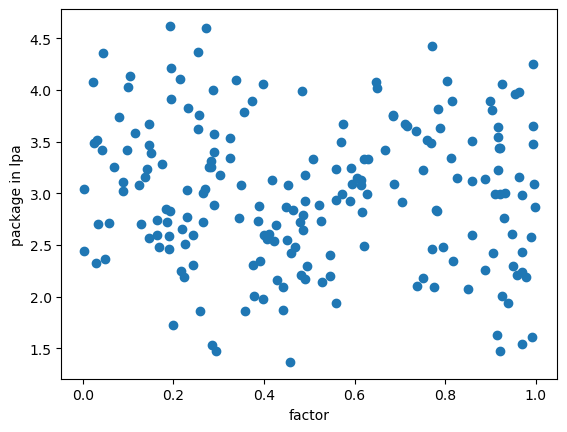

In [48]:
plt.scatter(df1['factor'],df1['package'])

plt.xlabel('factor')
plt.ylabel('package in lpa')

In [49]:
#factor has no relation with our label package it should reduce the r2_score.

In [51]:
X=df1.iloc[:,0:2]
y=df.iloc[:,-1]

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [53]:
X_train.shape

(140, 2)

In [54]:
y_train.shape

(140,)

In [55]:
X_test.shape

(60, 2)

In [56]:
y_test.shape

(60,)

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred=lr.predict(X_test)

In [61]:
y_pred.shape

(60,)

In [62]:
r2 =r2_score(y_test,y_pred)

In [63]:
r2

0.7733152641070218

In [64]:
r2_adj = 1-((1-r2)*(60-1)/(60-1-2))

In [65]:
r2_adj

0.765361413724812

In [66]:
#r2 adjusted score reduced with the addition of irrelevant factor

In [67]:
# add releveant and such an independent features which result in change in label

In [68]:
df2 = df.copy()

df2['iq'] = df2['package'] + (np.random.randint(-12,12,200)/10)

df2 = df2[['cgpa','iq','package']]

In [69]:
df2.head()

,cgpa,iq,package
0,6.89,3.96,3.26
1,5.12,2.38,1.98
2,7.82,2.25,3.25
3,7.42,4.77,3.67
4,6.94,3.47,3.57


In [70]:
#scatter plot od df2 to see how it is related to label

In [73]:
df2['iq'].shape

(200,)

Text(0, 0.5, 'package')

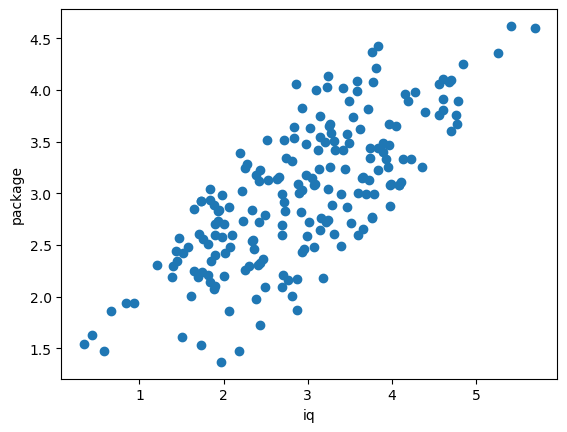

In [89]:
plt.scatter(df2['iq'],df2['package'])
plt.xlabel('iq')
plt.ylabel('package')

In [134]:
X=df2.iloc[:,0:2]
y=df2.iloc[:,-1]

In [135]:
X.shape

(200, 2)

In [136]:
y.shape

(200,)

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [138]:
X_train.shape

(140, 2)

In [139]:
y_train.shape

(140,)

In [140]:
X_test.shape

(60, 2)

In [141]:
y_test.shape

(60,)

In [142]:
lr= LinearRegression()

In [143]:
lr.fit(X_train,y_train)

LinearRegression()

In [144]:
y_pred=lr.predict(X_test)

In [145]:
y_pred

array([4.00199839, 3.15458642, 2.32121035, 2.56227019, 1.57032753,
       1.61829431, 2.08800974, 2.9594051 , 3.76078096, 2.81015564,
       3.95059456, 3.44443815, 3.02212622, 2.33817578, 3.26380026,
       3.27899504, 1.76984294, 3.47324457, 2.90305299, 3.36841816,
       2.42007343, 3.29952037, 2.74959227, 2.94245825, 3.69116472,
       2.70759124, 3.45764894, 3.53279048, 3.85776672, 1.92712781,
       3.55010826, 3.13604267, 3.66674332, 2.49904154, 2.77653995,
       3.19020228, 3.55494988, 2.80604865, 2.68934409, 2.56986758,
       3.00509128, 4.1511436 , 2.0726412 , 1.88614424, 3.60428404,
       2.89631546, 2.80889251, 2.92098255, 3.44154337, 3.4835444 ,
       4.0594213 , 3.48880787, 2.92012268, 2.43149498, 2.86934921,
       2.74427548, 1.74443883, 2.31775471, 2.79882218, 3.05968891])

In [146]:
r2 =r2_score(y_test,y_pred)

In [147]:
r2

0.8281206094630433

In [148]:
df2.corr()

,cgpa,iq,package
cgpa,1.000000,0.697882,0.880692
iq,0.697882,1.000000,0.748158
package,0.880692,0.748158,1.000000


In [149]:

1 - ((1-r2)*(40-1)/(40-1-2))

0.8188298315961808

### after adding a column iq we have r2 score of .82 increment of .5 in r2 score